<a href="https://colab.research.google.com/github/yeyevtushenko/AI/blob/Lesson27.03.2024/Lesson27_03_2024_AI_P_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів

In [1]:
import pandas as pd
import torch
import pandas as pd

device = "cpu"
torch.set_default_device(device)

Дані про морське вухо(молюск)

<div>
<img src="https://m.media-amazon.com/images/I/81-FC5TlLtL.jpg" width="500"/>
</div>

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/abalone.csv')
df.drop(columns=['Type', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight'], inplace=True)

In [3]:
df.head()

,LongestShell,Diameter,Height,Rings
0,0.455,0.365,0.095,15
1,0.350,0.265,0.090,7
2,0.530,0.420,0.135,9
3,0.440,0.365,0.125,10
4,0.330,0.255,0.080,7


Потрібно на основі розмірів молюска спрогнозувати кількість кілець в мушлі `Rings`. Використовуйте процесор cpu

# Завдання 1
Створіть клас Dataset

In [4]:
from torch.utils.data import Dataset


class MyDataset(Dataset):
    def __init__(self, X, y):
      self.X = torch.FloatTensor(X.values).to(device)
      self.y = torch.FloatTensor(y.values).to(device)
      self.y = self.y.reshape(-1, 1)

    def __len__(self):
      return len(self.X)

    def __getitem__(self, idx):
      return self.X[idx], self.y[idx]

# Create dataset object
X = df.drop(columns=['Rings'])
y = df['Rings']

dataset = MyDataset(X, y)


# Завдання 2
Створіть DataLoader. Перевірте розміри даних в першому пакеті. Розмір пакетів оберіть самостійно

In [5]:
from torch.utils.data import DataLoader

batch_size = 128
dataloader = DataLoader(dataset,
                        batch_size=batch_size,
                        shuffle=True,
                        generator=torch.Generator(device=device))

In [6]:
X_batch, y_batch = next(iter(dataloader))
X_batch.shape

torch.Size([128, 3])

In [7]:
torch.Size([128, 2])
y_batch.shape

torch.Size([128, 1])

In [8]:
torch.Size([128, 1])
X_batch.device

device(type='cpu')

# Завдання 3
Створіть нейромережу:
* Кількість шарів оберіть між 1-3
* Виберіть різні функції активації: Relu, LeakyRelu, Swish
* Кілкість нейронів у прихованих шарах повинна **не зростати**

In [9]:
from torch import nn


model = nn.Sequential(
    nn.Linear(3, 2),
    nn.ReLU(),
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 1)
)

model

Sequential(
  (0): Linear(in_features=3, out_features=2, bias=True)
  (1): ReLU()
  (2): Linear(in_features=2, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
)

In [10]:
from torchsummary import summary

summary(model, input_size=(3,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 2]               8
              ReLU-2                    [-1, 2]               0
            Linear-3                    [-1, 4]              12
              ReLU-4                    [-1, 4]               0
            Linear-5                    [-1, 1]               5
Total params: 25
Trainable params: 25
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


# Завдання 4
Визначте функцію втрат та оптимізатор

In [11]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# Завдання 5
Натренуйте нейромережу. візміть невелику кількість епох

In [12]:
import numpy as np

num_epochs = 100

losses=[]
for epoch in range(num_epochs):
  losses_ = []
  for X_batch, y_batch in dataloader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        losses_.append(loss.item())

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

  losses.append(np.mean(losses_))

  if epoch % 1 == 0:
          print(f'loss={losses[-1]}')

#Чомусь кожен раз як я запускаю - лос зменшується. На пошатку був біля 100, і після додаткових запусків доходило до 8. Тобто з кожним кліком запускається нова ітерація і нові епохи донавчають модель?

loss=111.29726802941525
loss=95.88410325483842
loss=81.28410501191111
loss=64.35860893943094
loss=43.569243575587414
loss=24.319797891559023
loss=14.199157281355424
loss=11.122593287265662
loss=10.508544343890566
loss=10.377689144828103
loss=10.362017891623758
loss=10.368726831493955
loss=10.389056321346398
loss=10.389086968971021
loss=10.369262290723396
loss=10.455011830185398
loss=10.396389773397734
loss=10.423616004712654
loss=10.386887261361787
loss=10.430387641444351
loss=10.417644572980477
loss=10.380676385128137
loss=10.388558445554791
loss=10.42163627797907
loss=10.442478642319188
loss=10.394365541862719
loss=10.381583733992143
loss=10.420671723105691
loss=10.408322897824375
loss=10.398622931856098
loss=10.418682112838283
loss=10.399434638745857
loss=10.38143575552738
loss=10.362492662487607
loss=10.385762272459088
loss=10.365364118055863
loss=10.425321636777936
loss=10.434683611898711
loss=10.37138962023186
loss=10.369645956790809
loss=10.340869657921068
loss=10.35690788789228

(0.0, 100.0)

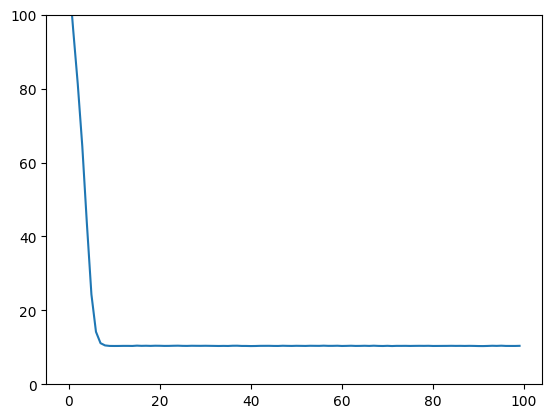

In [13]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.ylim(0, 100)

# Завдання 6
Збережіть нейромережу та зробіть прогноз

In [14]:
torch.save(model, 'model.pt')

In [15]:
load_model = torch.load('model.pt')

In [16]:
y[0]

15

In [17]:
X_data = torch.FloatTensor(X.values[[0]])
X_data = X_data.to(device)

print(X_data)
print(X_data.shape)

tensor([[0.4550, 0.3650, 0.0950]])
torch.Size([1, 3])


In [18]:
load_model(X_data)

tensor([[9.9180]], grad_fn=<AddmmBackward0>)

In [19]:
with torch.no_grad(): # без градієнтів
  print(load_model(X_data))

tensor([[9.9180]])
